In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
import faciesplot
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


# 2. Import data
Our data is stored in .csv file. This type of tabular data can be easily read by the pandas.read_csv method. You can actually take a look at the data in this file by openning it using Microsoft Excel. For this lab exercise, we will use the pandas.read_csv method to load the data into a dataframe, which provides a convenient data structure to work with well log data.

In [2]:
data = pd.read_csv('training_data.csv')

# 3. Get to know your data

Let us take a look at the first five rows using the DataFrame's head() method.

In [3]:
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


Another useful way to have a quick overview of the statistical distribution of the data is to call the data.describe(). 

In [4]:
data.describe()  

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


Or, you can simply do the following to see what is actually in this set of data.

In [5]:
data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
3227,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


The data set consists of seven features (five wireline log measurements and two indicator variables) and a facies label at half-foot depth intervals. In machine learning terminology, the set of measurements at each depth interval comprises a **feature vector**, each of which is associated with a **label** (the facies type). <br>

From the above table, we observe that we have 3232 feature vectors in the data sets. 

The seven predictor variables (or, input variables) are: <br>
* Five wire line log curves include <br>
1\. [gamma ray](http://petrowiki.org/Gamma_ray_logs) (GR),  <br>
2\. [resistivity logging](http://petrowiki.org/Resistivity_and_spontaneous_%28SP%29_logging) (ILD_log10), <br>
3\. [photoelectric effect](http://www.glossary.oilfield.slb.com/en/Terms/p/photoelectric_effect.aspx) (PE), <br>
4\. [neutron-density porosity difference](http://petrowiki.org/Neutron_porosity_logs) (DeltaPHI ).  <br>
5\. [average neutron-density porosity](http://petrowiki.org/Neutron_porosity_logs) (PHIND). <br>
<br>
* Two geologic constraining variables: <br>
6\. nonmarine-marine indicator (NM_M). <br>
7\. relative position (RELPOS). <br>

Note, some wells do not have PE. <br>

The nine discrete facies (classes of rocks) are: 
<img src = "1_facies.PNG">

These facies aren't discrete, and gradually blend into one another. Some have neighboring facies that are rather close.  Mislabeling within these neighboring facies can be expected to occur.  The following table lists the facies, their abbreviated labels and their approximate neighbors.

To find out the unique well names, you can use the numpy.unique().

In [6]:
data['Well Name'].unique()

array(['SHRIMPLIN', 'SHANKLE', 'LUKE G U', 'CROSS H CATTLE', 'NOLAN',
       'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE'], dtype=object)

To look at the distribution of different facies, please run the code in the following cell. 

SS      259
CSiS    738
FSiS    615
SiSh    184
MS      217
WS      462
D        98
PS      498
BS      161
Name: Facies, dtype: int64

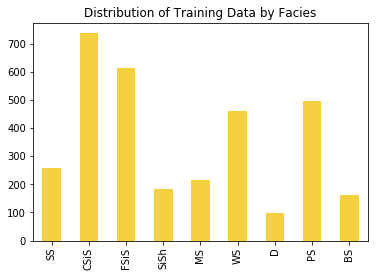

In [7]:
#count the number of unique entries for each facies, sort them by facies number (instead of by number of entries)
facies_counts = data['Facies'].value_counts().sort_index()
#use facies labels to index each count
# 1=sandstone  2=c_siltstone   3=f_siltstone 
# 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite
# 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00','#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']
facies_labels_unique = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS','WS', 'D','PS', 'BS']
facies_counts.index = facies_labels_unique

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

This shows the distribution of examples by facies for the 3232 training examples in the training set.  Dolomite (facies 7) has the fewest with 141 examples.  There are also only 185 bafflestone examples.  Depending on the performance of the classifier we are going to train, we may consider getting more examples of these facies.

Let us take a look at the well log measurements and the lithofacies from the well 'SHRIMPLIN'.

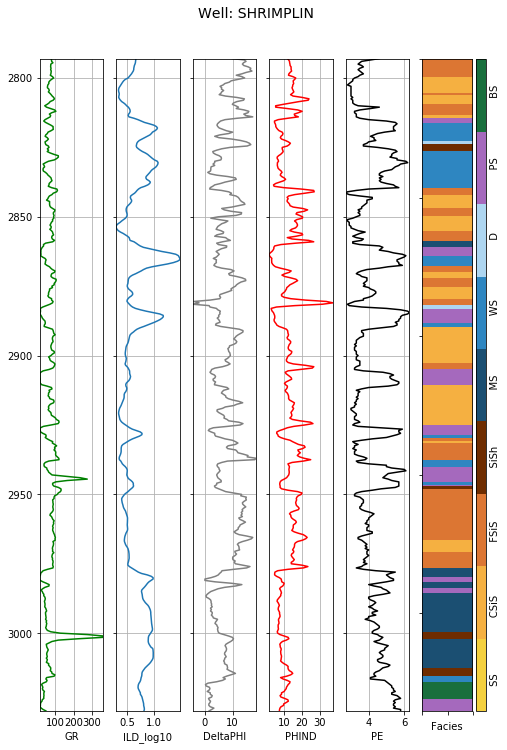

In [8]:
from faciesplot import make_facies_log_plot
make_facies_log_plot(data[data['Well Name'] == 'SHRIMPLIN'], facies_colors)

<font color = red>**Task 2:**</font> Creat a similar plot that shows the well log measurements and the facies from well 'NEWBY'. <font color = red>**(5 points)**</font>

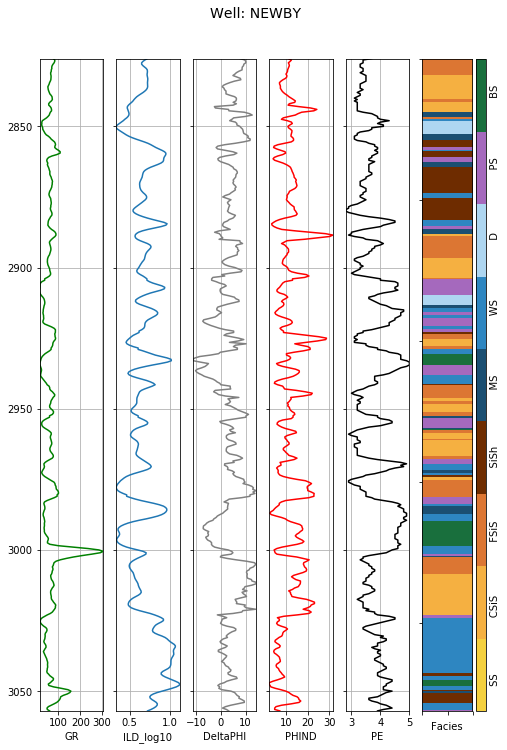

In [9]:
make_facies_log_plot(data[data['Well Name'] == 'NEWBY'], facies_colors)

# 4 Split data into training and test set
We will remove one well from the data that we just explored above, for the purpose of testing the performance of our classifier. The next line of code removes the data from well '<font color = red>**SHANKLE**</font>' and put it aside for testing purpose. That is, after we finish training our classifier and fine-tuning all the hyperparameters, we will use this set of data to test our support vector machine classifier.

In [10]:
test_data = data[data['Well Name'] == 'SHANKLE']

We will use all the other remaining data as our training and cross-valiation data.

In [11]:
training_data = data[data['Well Name']!='SHANKLE']

Crossplots are a familiar tool in the geosciences to visualize how two properties vary with rock type.  This dataset contains 5 log variables, and scatter matrix can help to quickly visualize the variation between the all the variables in the dataset.  We can employ the very useful [Seaborn library](https://stanford.edu/~mwaskom/software/seaborn/) to quickly create a nice looking scatter matrix. Each panel in the plot shows the relationship between two of the variables on the x and y axis, with a stacked bar plot showing the distribution of each type of measurement along the diagonal. 

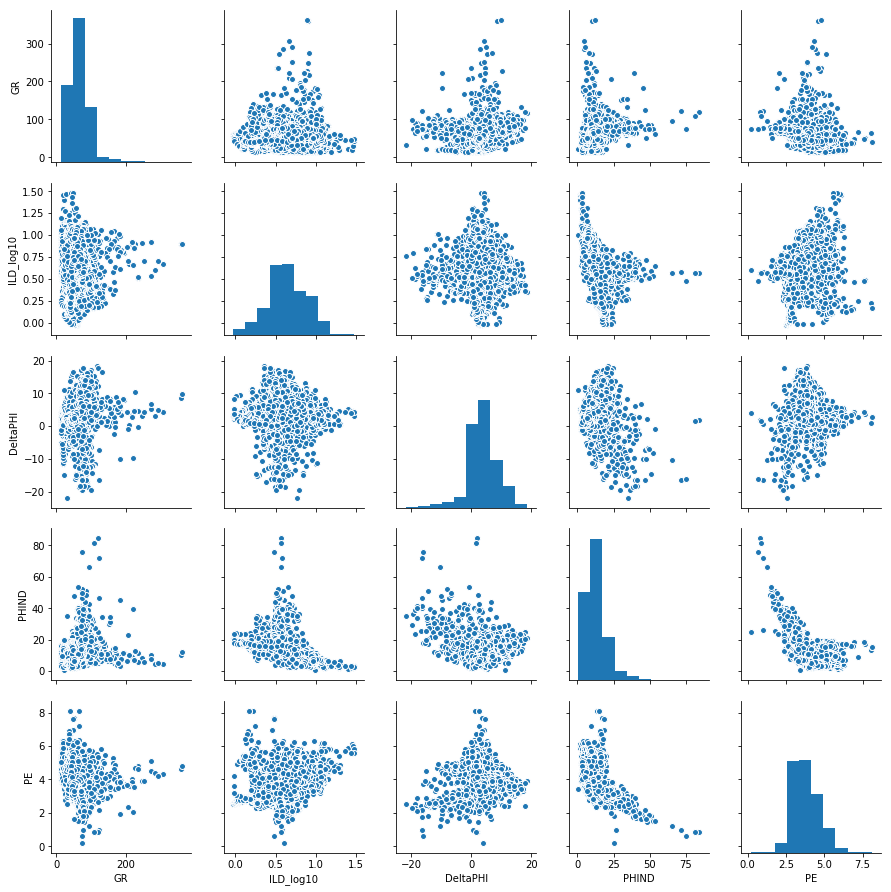

In [12]:
features = ['GR','ILD_log10','DeltaPHI','PHIND','PE','NM_M','RELPOS']
input_feature_vectors = training_data[features]
output_facies_labels = training_data['Facies']
sns.pairplot(input_feature_vectors[['GR','ILD_log10','DeltaPHI','PHIND','PE']])

In [13]:
input_feature_vectors_validation = test_data[features]
output_facies_labels_validation = test_data['Facies']

It is not clear from these crossplots what relationships exist between the measurements and facies labels. This is where machine learning will prove useful. 

# 5. Preprocessing data
Many machine-learning algorithms assume the feature data are normally distributed (i.e., Gaussian with zero mean and unit
variance). The above figure shows us that this is not the case with our training data. We will condition, or standardize, the training data so that it has this property. The same factors used to standardize the training set must be applied to any subsequent data set that will be classified. Scikit-learn includes a handy StandardScalar class that can be applied to the training set and later used to standardize any input data. <br>

Recall that you already implemented the scaling, or standardizing, procedure in the lab exercise on logistic regression. So, the codes in the following cell should look very familiar to you. 

<font color = red>**Task 3:**</font> Import StandardScaler from Scikit-learn. <font color = red>**(10 points)**</font>

**HINT**: If you forget how to do it, please refer back to your lab exercise on logitic regression.

In [14]:
from sklearn.preprocessing import StandardScaler

<font color = red>**Task 4:**</font> Perform scaling using the imported StandardScaler, and assign the final scaled data to a new variable *scaled_features*. <font color = red>**(15 points)**</font>

**HINT**: If you forget how to do it, please refer back to your lab exercise on logitic regression. Remember that we are only scaling the input feature vectors, NOT the labels.

In [15]:
scaler = StandardScaler().fit(input_feature_vectors)
scaled_features = scaler.transform(input_feature_vectors)

In [16]:
scaler_validation = StandardScaler().fit(input_feature_vectors_validation)
scaled_features_validation = scaler_validation.transform(input_feature_vectors_validation)

Next, let us create a new variable **X_train** for the input variables (or, feature vectors) from the training data. Similarly, we will also create a new varaible **y_train** for the output variables (i.e., our labels).

In [17]:
X_train = scaled_features
y_train = output_facies_labels
X_validation = scaled_features_validation
y_validation = output_facies_labels_validation

In [18]:
y_train.astype(int)

0       3
1       3
2       3
3       3
4       3
       ..
3227    5
3228    5
3229    5
3230    5
3231    5
Name: Facies, Length: 2783, dtype: int64

# 6. One Hot encoding

In [19]:
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [20]:
y_traintype = y_train.astype(int)

In [21]:
onehot_encoder = OneHotEncoder(sparse=False)
y_traintype = y_traintype.reshape(len(y_traintype), 1)
onehot_encoded = onehot_encoder.fit_transform(y_traintype)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


In [22]:
np.set_printoptions(threshold=10)

In [23]:
onehot_encoded

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
y_train_new = onehot_encoded

In [25]:
tmpa = np.zeros((y_train.shape[0],9))
y_validation_type = y_validation.astype(int)
onehot_encoder_validation = OneHotEncoder(sparse=False)
y_validation_type = y_validation_type.reshape(len(y_validation_type), 1)
onehot_encoded_validation = onehot_encoder_validation.fit_transform(y_validation_type)
y_validation_new = onehot_encoded_validation

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [26]:
y_train.astype(int)

0       3
1       3
2       3
3       3
4       3
       ..
3227    5
3228    5
3229    5
3230    5
3231    5
Name: Facies, Length: 2783, dtype: int64

In [27]:
tmpa = np.zeros((y_validation.shape[0],9))

In [28]:
x=0
y=0

In [29]:
tmpa[x:onehot_encoded_validation.shape[0], y:onehot_encoded_validation.shape[1]] = onehot_encoded_validation

In [30]:
y_validation_new = tmpa

# 7. Import Tensorflow

In [31]:
import tensorflow as tf

In [32]:
tf.reset_default_graph()

In [33]:
print(X_validation.shape[1])

7


In [34]:
n_inputs = 7
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 9

In [35]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="InputImages")
y = tf.placeholder(tf.float32, shape=(None, 9), name="TrueLabel")

In [36]:
hidden1 = tf.layers.dense(X, n_hidden1, name='hidden1', activation=tf.nn.relu)
hidden2 = tf.layers.dense(hidden1, n_hidden2, name='hidden2', activation=tf.nn.relu)
output  = tf.layers.dense(hidden2, n_outputs, name='output')

In [37]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=output)
cost = tf.reduce_mean(cross_entropy)

In [46]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
training  = optimizer.minimize(cost)

In [47]:
compare = tf.equal(tf.argmax(output,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(compare,tf.float32))

# 6. Execute Computation Graph

In [48]:
init = tf.global_variables_initializer()

In [49]:
saver = tf.train.Saver()  # This is to save the model that you are going to train.

In [50]:
n_epochs = 30
batch_size = 23
n_batches = int(np.ceil(2783/batch_size))

In [51]:
def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index) 
    indices = np.random.randint(2783, size=batch_size)  
    X_batch = X_train[indices] 
    y_batch = y_train_new[indices,:]
    return X_batch, y_batch

In [52]:
X_train.shape[0]

2783

0 Train accuracy: 0.73913044 Test accuracy: 0.36971048
1 Train accuracy: 0.65217394 Test accuracy: 0.52115816
2 Train accuracy: 0.73913044 Test accuracy: 0.52115816
3 Train accuracy: 0.65217394 Test accuracy: 0.5835189
4 Train accuracy: 0.73913044 Test accuracy: 0.5902004
5 Train accuracy: 0.9130435 Test accuracy: 0.5167038
6 Train accuracy: 0.6956522 Test accuracy: 0.5167038
7 Train accuracy: 0.6956522 Test accuracy: 0.48106903
8 Train accuracy: 0.8695652 Test accuracy: 0.64810693
9 Train accuracy: 0.65217394 Test accuracy: 0.5055679
10 Train accuracy: 0.9130435 Test accuracy: 0.6013363
11 Train accuracy: 0.8695652 Test accuracy: 0.5100223
12 Train accuracy: 0.8695652 Test accuracy: 0.5545657
13 Train accuracy: 0.8695652 Test accuracy: 0.5233853
14 Train accuracy: 0.5217391 Test accuracy: 0.55679286
15 Train accuracy: 0.9130435 Test accuracy: 0.5167038
16 Train accuracy: 0.6956522 Test accuracy: 0.47216037
17 Train accuracy: 0.73913044 Test accuracy: 0.54342985
18 Train accuracy: 1.0 

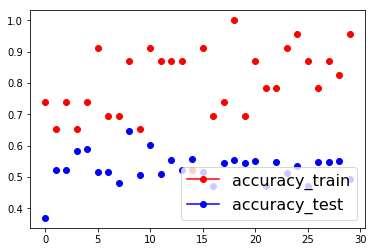

In [53]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in np.arange(n_epochs):
        for batch_index in np.arange(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training,feed_dict={X:X_batch, y:y_batch})
        accuracy_train = sess.run(accuracy,feed_dict={X:X_batch, y:y_batch})
        accuracy_test  = sess.run(accuracy,feed_dict={X:X_validation, y:y_validation_new})
        print(epoch, "Train accuracy:", accuracy_train, "Test accuracy:", accuracy_test)
        plt.plot(epoch, accuracy_train,'-ro',label='accuracy_train')
        plt.plot(epoch, accuracy_test,'-bo',label='accuracy_test')
    plt.legend(loc="lower right", fontsize=16)
    plt.show()
    
    save_patch = saver.save(sess,'./my_DNN_model.ckpt')

In [54]:
with tf.Session() as sess:
    saver.restore(sess, "./my_DNN_model.ckpt") # or better, use save_path
    X_new_scaled = X_validation[:30,:]
    Z = output.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_DNN_model.ckpt


In [55]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_validation.astype(int)[:30])

Predicted classes: [7 2 1 ... 0 0 0]
Actual classes:    471    2
472    2
473    2
474    2
475    2
      ..
496    1
497    1
498    1
499    1
500    1
Name: Facies, Length: 30, dtype: int64


# 6. Visualize Computation Graph

In [56]:
# the following code is copied and pasted from Aurelien Geron's book. This code was orginally writeen by A. Mordvintsev.
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [57]:
show_graph(tf.get_default_graph())

# 7. Make predictions on test data
Now, let us test this classifer on the test data set. First, we need to get the test data ready.

In [1]:
y_test = test_data['Facies'] # This is the true labels (i.e., true answeres) from the test well.
test_well_features = test_data.drop(['Facies','Formation','Well Name','Depth'], axis = 1)
X_test = scaler.transform(test_well_features) # This is the data on which we are going to make predictions using the SVM classifier that you just trained.

NameError: name 'test_data' is not defined

<font color = red>**Task 8:**</font> Make predictions on test_data, and assign the predictions to a new variable *y_pred* <font color = red> **(10 points)**</font>

**HINT:** To make predicions, all you need to do is something like some_clf.predict(testdata).

# 8. Evaluation

Because we know the true facies labels in the test data set, we can use these true labels to evaluate how good our predictions are.

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=facies_labels_unique))

NameError: name 'y_test' is not defined

Remember that, precision and recall are metrics that tell us how the classifier is performing for individual facies. Precision is the probability that, given a classification result for a sample, the sample actually belongs to that class. Recall is the probability that a sample will be correctly classified for a given class. For example, if the classifier predicts that an interval is fine siltstone (FSiS), there is a 64% probability that the interval is actually fine siltstone (precision). If an interval is actually fine siltstone, there is a 55% probability that it will be correctly classified (recall). The F1 score combines both accuracy and precision to give a single measure of relevancy of the classifier results.

<font color = red>**Task 9:**</font> Interprete the precision and recall scores for CSiS. <font color = red> **(10 points)**</font>


The precision of CSiS is .37 meaning there is a 37% chance that the sample is CSiS. The Recall score was .73, meaning there is a 73% probability that the sample is correctly classified if it is CSiS. The f1 score of .49 tells us a combination of accuracy and precision to provide a single measure of relevancy of the classifer results.

This means there is a high probability(73%) that the interval is calssified as CSiS if the interval is CSiS. However there is a low probability(37%) that an interval classified as CSiS is correctly classified as CSiS.

Now, let us plot up the predictions in the log-plot form and compare them with the ground truth

In [142]:
from faciesplot import compare_facies_plot  # import the plotting codes

In [143]:
test_data['Prediction'] = y_pred
compare_facies_plot(test_data, 'Prediction',facies_colors)

ValueError: Length of values does not match length of index

Excellent!

## References

1\. Amato del Monte, A., 2015. Seismic Petrophysics: Part 1, *The Leading Edge*, 34 (4). [doi:10.1190/tle34040440.1](http://dx.doi.org/10.1190/tle34040440.1)

2\. Bohling, G. C., and M. K. Dubois, 2003. An Integrated Application of Neural Network and Markov Chain Techniques to Prediction of Lithofacies from Well Logs, *KGS Open-File Report* 2003-50, 6 pp. [pdf](http://www.kgs.ku.edu/PRS/publication/2003/ofr2003-50.pdf)

3\.Dubois, M. K., G. C. Bohling, and S. Chakrabarti, 2007, Comparison of four approaches to a rock facies classification problem, *Computers & Geosciences*, 33 (5), 599-617 pp. [doi:10.1016/j.cageo.2006.08.011](http://dx.doi.org/10.1016/j.cageo.2006.08.011)

4\. Hall, B., 2016, Facies Classification Using Machine Learning, The Leading Edge, 35(10). [doi:10.1190/tle35100906.1](http://dx.doi.org/10.1190/tle35100906.1)